In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df_complete= pd.read_csv('dataset.csv',index_col=0)

In [3]:
# Crear un diccionario de mapeo
mapping = {'Human-Generated-Text': 0, 'AI-Generated-Text': 1}

In [4]:
#Reemplazar las clases en la columna 'class' con el mapeo

df_complete['class'] = df_complete['class'].map(mapping)

In [5]:
df_complete.text[3]

"Derrick George Sherwin (16 April 1936 – 17 October 2018) was an English television producer, writer, story editor and actor. After beginning his career in the theatre, Sherwin became an actor in television before moving into writing. He became the story editor on Doctor Who and, as the producer of the series in 1969, he oversaw the transition from black-and-white to colour by producing Patrick Troughton's final story and Jon Pertwee's first. He also co-produced Paul Temple for the BBC. Early life\nSherwin began his career in the theatre and worked as a junior set designer, scenic artist, scene shifter, stage manager and lighting designer. He also spent two years of National Service in the Royal Air Force. Following this, Sherwin established himself as an actor in theatre, films and television. While still working as an actor, Sherwin also began work as a freelance writer, contributing scripts to series such as Crossroads and Z-Cars."

In [6]:
df_complete.head(4)

,text,class
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,1
1,Mount Washington is a peak in the White Mount...,1
2,Acer hillsi is an extinct maple species that w...,1
3,Derrick George Sherwin (16 April 1936 – 17 Oct...,0


## Forma 1 de limpieza

In [7]:
import gensim # take text for clean and tokenize list of words
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
nltk.download('stopwords') #language package for english
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words = list(stopwords.words("english"))

In [9]:
'''import gensim
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Inicializamos PorterStemmer
ps = PorterStemmer()

# Cargamos las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y procesar el texto
def limpiar_texto(text):
    # Verificar si el texto no es nulo o vacío
    if isinstance(text, str):
        # Eliminar saltos de línea y múltiples espacios
        text = re.sub(r'\s+', ' ', text)  # Reemplaza saltos de línea y tabs por un espacio
        text = text.strip()  # Elimina espacios en blanco iniciales y finales

        # Convertir a palabras en minúsculas y filtrar stopwords
        words = [
            ps.stem(word) for word in gensim.utils.simple_preprocess(text)
            if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words
        ]
        return words
    else:
        return None  # Devuelve None si el texto es inválido

# Aplicar la función de limpieza al DataFrame
df_complete['text_keywords'] = df_complete['text'].apply(limpiar_texto)

# Eliminar filas donde el texto limpio es None o vacío
df_complete = df_complete[df_complete['text_cleaned'].notnull() & (df_complete['text_cleaned'] != '')]

# Reiniciar el índice del DataFrame después de eliminar las filas
df_complete.reset_index(drop=True, inplace=True) '''

"import gensim\nimport re\nfrom nltk.corpus import stopwords\nfrom nltk.stem import PorterStemmer\n\n# Inicializamos PorterStemmer\nps = PorterStemmer()\n\n# Cargamos las stopwords en inglés\nstop_words = set(stopwords.words('english'))\n\n# Función para limpiar y procesar el texto\ndef limpiar_texto(text):\n    # Verificar si el texto no es nulo o vacío\n    if isinstance(text, str):\n        # Eliminar saltos de línea y múltiples espacios\n        text = re.sub(r'\\s+', ' ', text)  # Reemplaza saltos de línea y tabs por un espacio\n        text = text.strip()  # Elimina espacios en blanco iniciales y finales\n\n        # Convertir a palabras en minúsculas y filtrar stopwords\n        words = [\n            ps.stem(word) for word in gensim.utils.simple_preprocess(text)\n            if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words\n        ]\n        return words\n    else:\n        return None  # Devuelve None si el texto es inválido\n\n# Aplicar la fun

In [10]:
import gensim
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Inicializamos PorterStemmer
ps = PorterStemmer()

# Cargamos las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y procesar el texto
def limpiar_texto(text):
    # Verificar si el texto no es nulo o vacío
    if isinstance(text, str):
        # Eliminar saltos de línea y múltiples espacios
        text = re.sub(r'\s+', ' ', text)  # Reemplaza saltos de línea y tabs por un espacio
        text = text.strip()  # Elimina espacios en blanco iniciales y finales

        # Convertir a palabras en minúsculas y filtrar stopwords
        words = [
            ps.stem(word) for word in gensim.utils.simple_preprocess(text)
            if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words
        ]
        return ' '.join(words)
    else:
        return None  # Devuelve None si el texto es inválido

# Aplicar la función de limpieza al DataFrame
df_complete['text_cleaned'] = df_complete['text'].apply(limpiar_texto)

# Eliminar filas donde el texto limpio es None o vacío
df_complete = df_complete[df_complete['text_cleaned'].notnull() & (df_complete['text_cleaned'] != '')]

# Reiniciar el índice del DataFrame después de eliminar las filas
df_complete.reset_index(drop=True, inplace=True)




In [11]:
df_complete.head(4)

,text,class,text_cleaned
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,1,sekhukhun matseb circa septemb known sekhukhun...
1,Mount Washington is a peak in the White Mount...,1,mount washington peak white mountain new hamps...
2,Acer hillsi is an extinct maple species that w...,1,acer hillsi extinct mapl speci endem central a...
3,Derrick George Sherwin (16 April 1936 – 17 Oct...,0,derrick georg sherwin april octob english tele...


In [12]:
X = df_complete["text_cleaned"]
y = df_complete["class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          300000 non-null  object
 1   class         300000 non-null  int64 
 2   text_cleaned  300000 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


Es muy recomendable escalar las características (variables X) cuando utilizas un modelo de SVM, ya que este modelo es sensible a las escalas de las características.

¿Por qué?
Los modelos de SVM calculan distancias entre puntos y fronteras de decisión. Si una característica tiene un rango mucho mayor que otra (por ejemplo, una que va de 0 a 1000 y otra que va de 0 a 1), las características de mayor escala dominarán las distancias y afectarán la precisión del modelo.

In [15]:
# Text Tokenization

from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Tokenization is necesary for preprocessing text to ML
# We will use CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) # dtm as document-term matrix
X_test_dtm = vect.transform(X_test)

In [17]:
# Escalar las características de X_train y X_test

from sklearn.preprocessing import StandardScaler # for standardization us
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_dtm)
X_test_scaled = scaler.transform(X_test_dtm)

### Machine learning models

In [18]:
# Aplicamos primero el modelo Multinomial de Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb_model = MultinomialNB().fit(X_train_scaled, y_train)

In [20]:
# hacemos la predicción 
pred_nb_model= nb_model.predict(X_test_scaled)

In [21]:
# obtenemos la precisión de nuestro modelo, accuracy
accuracy_nb=nb_model.score(X_test_scaled, y_test)
accuracy_nb

0.5315333333333333

In [22]:
# obtenemos la descomposición de la precisión, en sus tres variantes (precision, recall, f1score)

from sklearn.metrics import classification_report
# Metrics for NB

print(classification_report(y_test, pred_nb_model))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52     37535
           1       0.53      0.55      0.54     37465

    accuracy                           0.53     75000
   macro avg       0.53      0.53      0.53     75000
weighted avg       0.53      0.53      0.53     75000



In [23]:
# obtenemos la matriz de decisión del primer modelo
from sklearn.metrics import confusion_matrix
matriz1=confusion_matrix(y_test, pred_nb_model)


In [24]:
from tabulate import tabulate

In [25]:

encabezado=['Naive Bayes','AI','Human']
indice=['AI','Human']
print(tabulate(matriz1, headers=encabezado,showindex=indice, tablefmt='fancy_grid'))

╒═══════════════╤═══════╤═════════╕
│ Naive Bayes   │    AI │   Human │
╞═══════════════╪═══════╪═════════╡
│ AI            │ 19313 │   18222 │
├───────────────┼───────┼─────────┤
│ Human         │ 16913 │   20552 │
╘═══════════════╧═══════╧═════════╛


In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

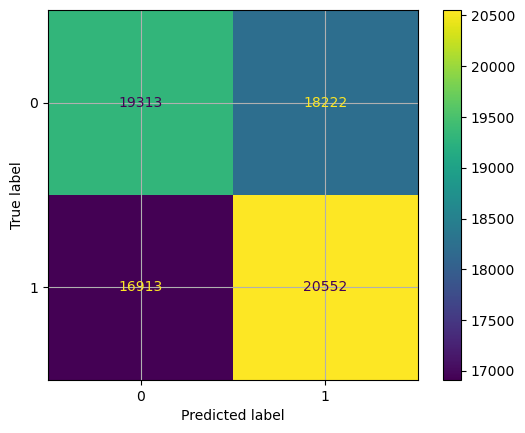

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz1)
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')  
plt.grid(True)
plt.show()

In [28]:
# Ahora hacemos la agrupación con el segundo modelo, el Support Vector Machine
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

In [29]:
SS = svm.LinearSVC()

In [30]:
# Para hacer la posterior representación de la curva de ROC, necesitamos obtener las probabilidades, y para ello usamos
# la función CalibratedClassifier
clf_svm = CalibratedClassifierCV(estimator=SS) 

In [31]:
# Ajustamos el modelo y realizamos la predicción
svm_model=clf_svm.fit(X_train_scaled, y_train)
pred_svm_model=svm_model.predict(X_test_scaled)

c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
# Descomposición de la precisión del segundo modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm_model))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     37535
           1       0.82      0.84      0.83     37465

    accuracy                           0.82     75000
   macro avg       0.82      0.82      0.82     75000
weighted avg       0.82      0.82      0.82     75000



In [33]:
# Matriz de decisión modelo SVM
matriz2=confusion_matrix(y_test, pred_svm_model)
encabezado=['SVM','IA','Human']
indice=['IA','Human']
print(tabulate(matriz2, headers=encabezado,showindex=indice, tablefmt='fancy_grid'))

accuracy_nb=svm_model.score(X_test_scaled, y_test)

╒═══════╤═══════╤═════════╕
│ SVM   │    IA │   Human │
╞═══════╪═══════╪═════════╡
│ IA    │ 30443 │    7092 │
├───────┼───────┼─────────┤
│ Human │  6174 │   31291 │
╘═══════╧═══════╧═════════╛


In [34]:

# Para hacer la comparativa con la curva de ROC, primero tenemos que obtener las probabilidades y después obtenemos los scores
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = nb_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]
y_score2 = svm_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

roc1=roc_auc_score(y_test, y_score1)
roc2=roc_auc_score(y_test, y_score2)

c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


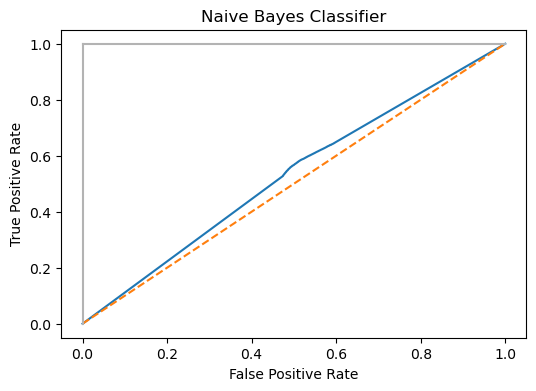

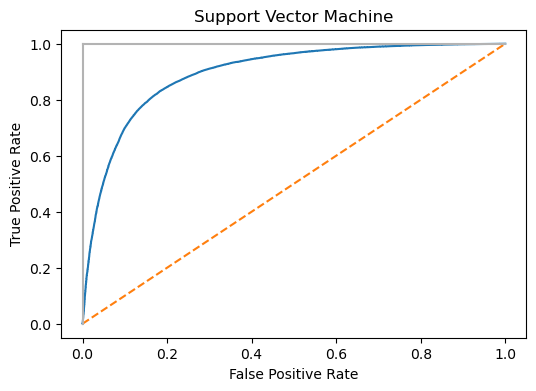

In [35]:
# Graficamos los valores de la curva ROC
plt.subplots(1, figsize=(6,4))
plt.title('Naive Bayes Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(6,4))
plt.title('Support Vector Machine')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:

# Tabla resumen y comparativa entre la precisión y la curva ROC de los dos modelos
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_mod1=precision_score(y_test, pred_nb_model, average='weighted')
precision_mod2=precision_score(y_test, pred_svm_model, average='weighted')

recall_mod1=recall_score(y_test, pred_nb_model, average='weighted')
recall_mod2=recall_score(y_test, pred_svm_model, average='weighted')

f1_mod1=f1_score(y_test, pred_nb_model, average='weighted')
f1_mod2=f1_score(y_test, pred_svm_model, average='weighted')

summary1=[[precision_mod1,recall_mod1,f1_mod1,roc1],[precision_mod2,recall_mod2,f1_mod2,roc2]]
encabezado=['Ratios','Precision','Recall','F1 Score','ROC/AUC']
indice=['Naive Bayes','SVM']
print(tabulate(summary1, headers=encabezado,showindex=indice, tablefmt='fancy_grid'))

╒═════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Ratios      │   Precision │   Recall │   F1 Score │   ROC/AUC │
╞═════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Naive Bayes │    0.531587 │ 0.531533 │   0.531398 │  0.530118 │
├─────────────┼─────────────┼──────────┼────────────┼───────────┤
│ SVM         │    0.823318 │ 0.82312  │   0.823096 │  0.895988 │
╘═════════════╧═════════════╧══════════╧════════════╧═══════════╛


In [37]:
from xgboost import XGBClassifier

In [53]:
X_train_scaled.shape

(225000, 416525)

In [48]:
# Crear y ajustar el modelo XGBoost para clasificación
xgboost_model = XGBClassifier()

# Configurar parámetros usando set_params
xgboost_model.set_params(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=0,
    objective='binary:logistic',
    eval_metric='logloss'
)

xgboost_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [49]:
# Hacer predicciones
pred_xgboost_model = xgboost_model.predict(X_test_scaled)

In [46]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# Definir el espacio de parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],  # Número de árboles
    'max_depth': [3, 4, 5],       # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8],       # Proporción de muestras a usar
    'colsample_bytree': [0.7, 0.8], # Proporción de características a usar
    'gamma': [0, 0.1, 0.2],        # Reducción de pérdida mínima
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist,
    n_iter=5,                # Número de iteraciones
    cv=2,                     # Número de pliegues para la validación cruzada
    verbose=1,                # Para ver el progreso
    random_state=42,          # Semilla para reproducibilidad
    n_jobs=-1                 # Usar todos los núcleos disponibles
)

# Ajustar el modelo
random_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Mejores parámetros: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Mejor puntuación: 0.8615466666666667


In [50]:
# Evaluación del modelo
accuracy_boost = accuracy_score(y_test, pred_xgboost_model)
print("Accuracy:", accuracy_boost)

Accuracy: 0.8598533333333334


In [51]:
# Metrics for Xgboost

print(classification_report(y_test, pred_xgboost_model))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86     37535
           1       0.84      0.89      0.86     37465

    accuracy                           0.86     75000
   macro avg       0.86      0.86      0.86     75000
weighted avg       0.86      0.86      0.86     75000



### Guardado de modelo Xgboost en pkl por los buenos resultados que ha tenido

In [52]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl usando joblib
joblib.dump(xgboost_model, 'xgboost_model_hiperparam.pkl')

['xgboost_model_hiperparam.pkl']

In [43]:

# Para hacer la comparativa con la curva de ROC, primero tenemos que obtener las probabilidades y después obtenemos los scores
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = nb_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]
y_score2 = svm_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]
y_score3 = xgboost_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

roc1=roc_auc_score(y_test, y_score1)
roc2=roc_auc_score(y_test, y_score2)
roc3=roc_auc_score(y_test, y_score3)

c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\anano\anaconda3\envs\final_project\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


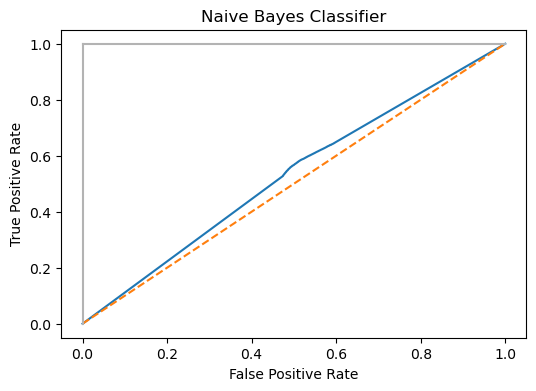

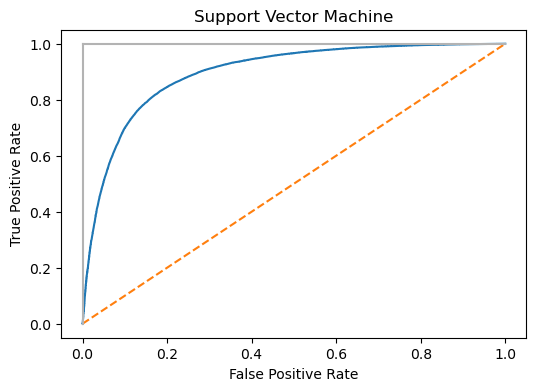

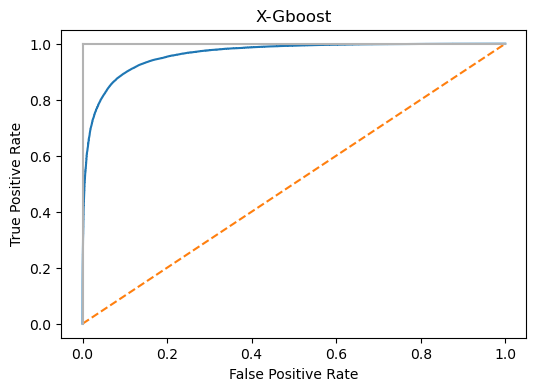

In [44]:
# Graficamos los valores de la curva ROC
plt.subplots(1, figsize=(6,4))
plt.title('Naive Bayes Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(6,4))
plt.title('Support Vector Machine')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(6,4))
plt.title('X-Gboost')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:

# Tabla resumen y comparativa entre la precisión y la curva ROC de los dos modelos
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_mod1=precision_score(y_test, pred_nb_model, average='weighted')
precision_mod2=precision_score(y_test, pred_svm_model, average='weighted')
precision_mod3=precision_score(y_test, pred_xgboost_model, average='weighted')

recall_mod1=recall_score(y_test, pred_nb_model, average='weighted')
recall_mod2=recall_score(y_test, pred_svm_model, average='weighted')
recall_mod3=recall_score(y_test, pred_xgboost_model, average='weighted')

f1_mod1=f1_score(y_test, pred_nb_model, average='weighted')
f1_mod2=f1_score(y_test, pred_svm_model, average='weighted')
f1_mod3=f1_score(y_test, pred_xgboost_model, average='weighted')

summary1=[[precision_mod1,recall_mod1,f1_mod1,roc1],[precision_mod2,recall_mod2,f1_mod2,roc2],[precision_mod3,recall_mod3,f1_mod3,roc3]]
encabezado=['Ratios','Precision','Recall','F1 Score','ROC/AUC']
indice=['Naive Bayes','SVM', 'X-Gboost']
print(tabulate(summary1, headers=encabezado,showindex=indice, tablefmt='fancy_grid'))

╒═════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Ratios      │   Precision │   Recall │   F1 Score │   ROC/AUC │
╞═════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Naive Bayes │    0.531587 │ 0.531533 │   0.531398 │  0.530118 │
├─────────────┼─────────────┼──────────┼────────────┼───────────┤
│ SVM         │    0.823318 │ 0.82312  │   0.823096 │  0.895994 │
├─────────────┼─────────────┼──────────┼────────────┼───────────┤
│ X-Gboost    │    0.897297 │ 0.897    │   0.896982 │  0.96352  │
╘═════════════╧═════════════╧══════════╧════════════╧═══════════╛
